In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("report.csv", low_memory=False)
df['StartTime'] = pd.to_datetime(df['StartTime'])
df.head()

,ID,StartTime,Duration_ns,ConnDuration_ns,DialDuration_ns,DNSDuration_ns,RequestDuration_ns,Status,StatusCode,Error
0,gateway,2024-02-12 16:02:35+01:00,13308083,3193625,1051792,1141583,38334,200 OK,200,NaN
1,httpgobin,2024-02-12 16:02:35+01:00,3568334,749375,300500,373292,74208,200 OK,200,NaN
2,gateway,2024-02-12 16:02:35+01:00,16208000,1760083,795792,942542,191333,200 OK,200,NaN
3,gateway,2024-02-12 16:02:35+01:00,19603333,3245250,1045083,1115708,20167,200 OK,200,NaN
4,gateway,2024-02-12 16:02:35+01:00,19627917,2113041,973541,1116750,12250,200 OK,200,NaN


In [17]:
df = df[df['Error'].isna()].copy()

In [18]:
for col in df.columns:
    if col.endswith('_ns'):
        ms_col = col.replace('_ns','_ms')
        df[ms_col] = df[col]/1000000

In [19]:
aggs = {
    col: ['count','mean','std'] for col in df.columns if col.endswith('_ms')
}
df.groupby(['ID','StatusCode']).agg(aggs)

Duration_ms                        ConnDuration_ms  \
                           count       mean         std           count   
ID        StatusCode                                                      
gateway   200              96702  36.086474  144.209241           96702   
httpgobin 200              96709  13.029732   97.448542           96709   

                                          DialDuration_ms            \
                          mean        std           count      mean   
ID        StatusCode                                                  
gateway   200         6.396891  74.001245           96702  4.220108   
httpgobin 200         5.401534  71.423685           96709  3.691307   

                                DNSDuration_ms                      \
                            std          count      mean       std   
ID        StatusCode                                                 
gateway   200         66.247341          96702  0.484014  5.519685   
httpgobin 200         67.781837          96709  0.413589  2.583796   

                     RequestDuration_ms                     netto_ms  \
                                  count      mean       std    count   
ID        StatusCode                                                   
gateway   200                     96702  0.036287  0.148089    96702   
httpgobin 200                     96709  0.037423  0.144971    96709   

                                             
                           mean         std  
ID        StatusCode                         
gateway   200         29.689583  123.912269  
httpgobin 200          7.628198   66.157702

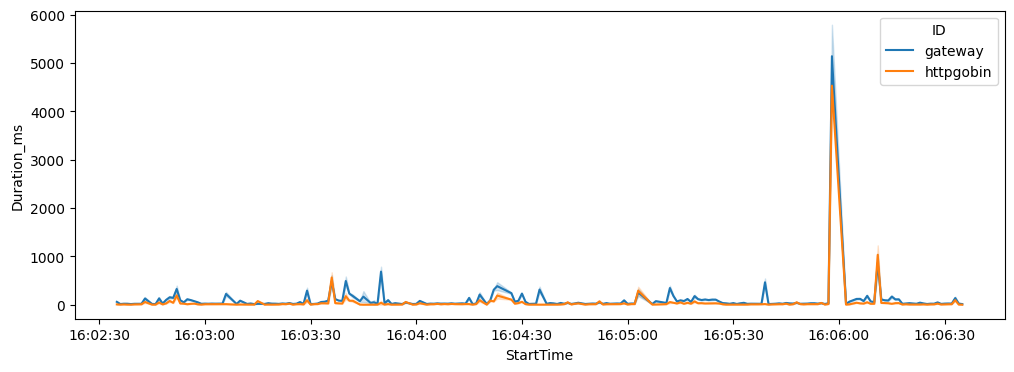

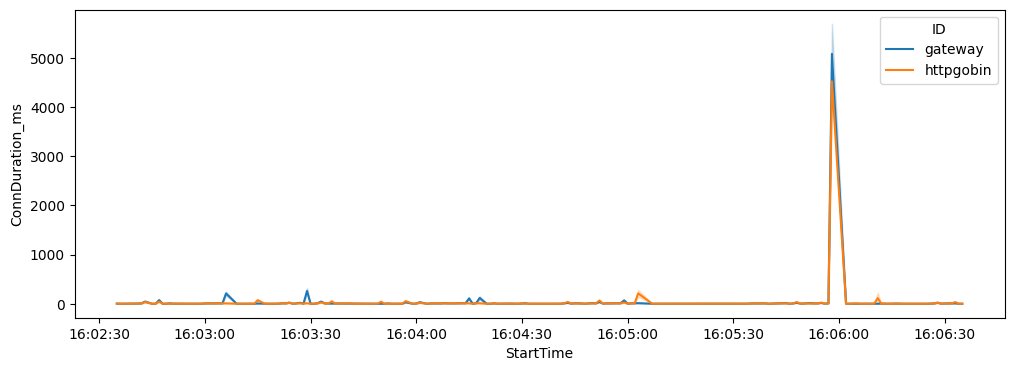

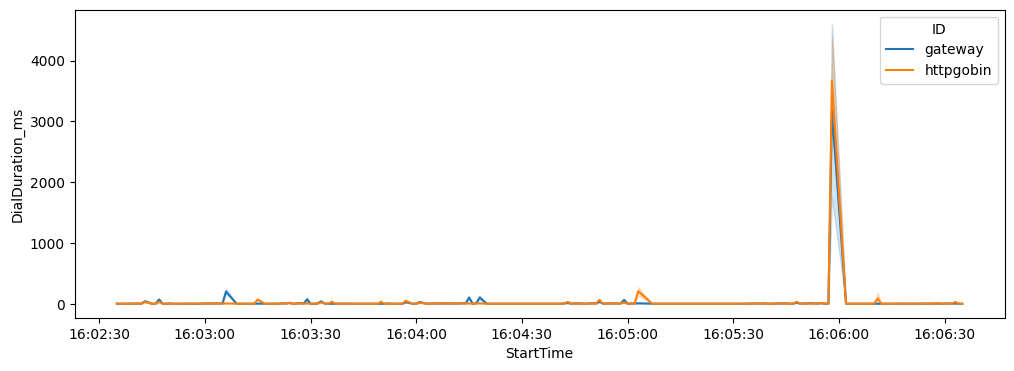

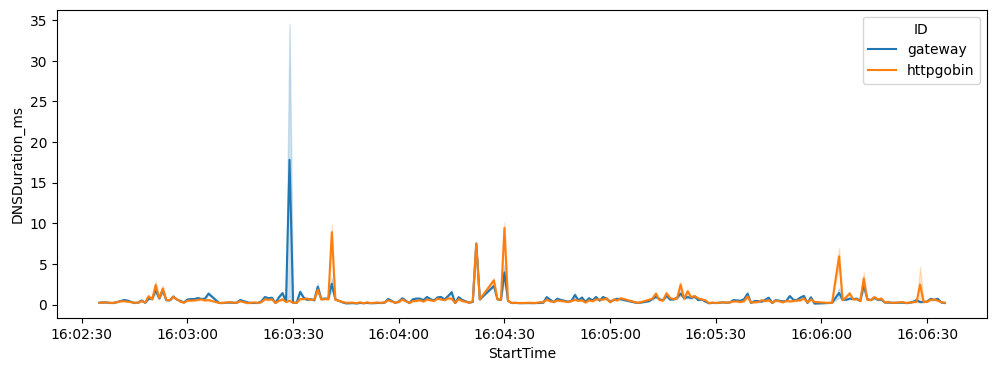

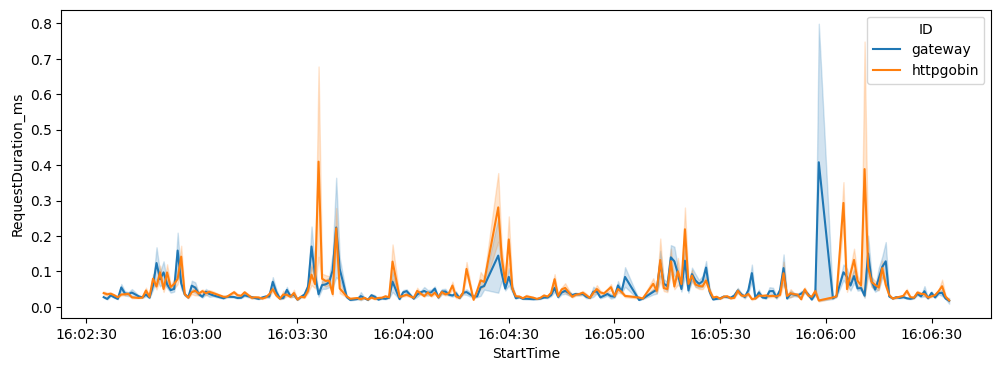

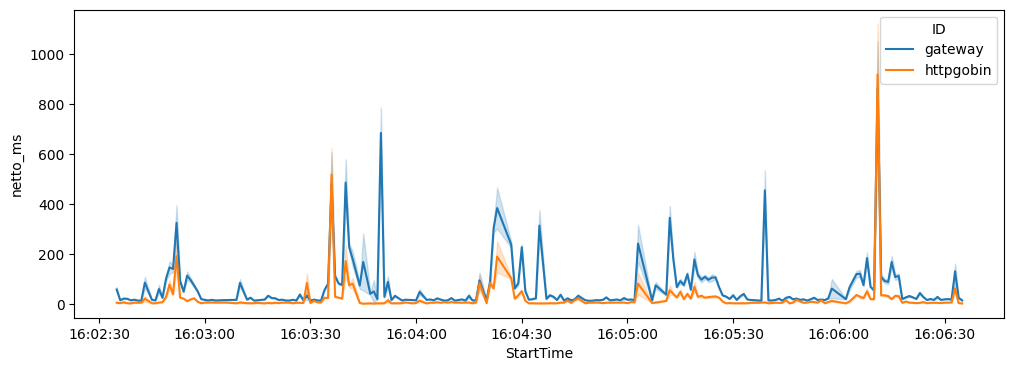

In [20]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.lineplot(data=df,x='StartTime',y=col,hue="ID",errorbar='se')
        plt.show()

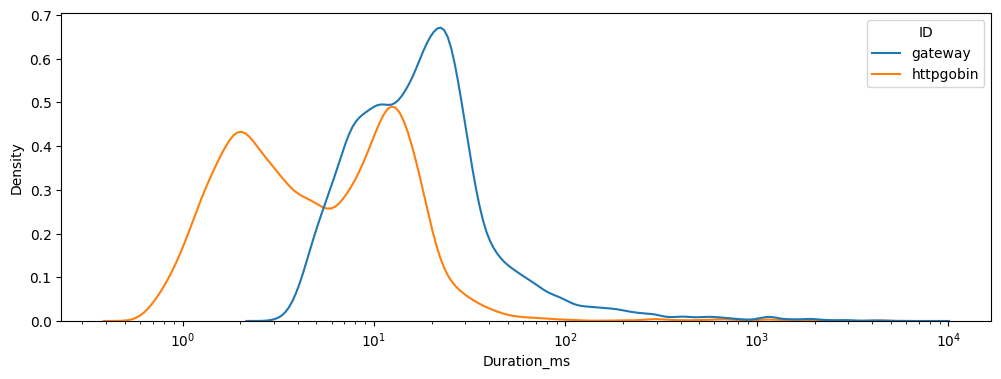

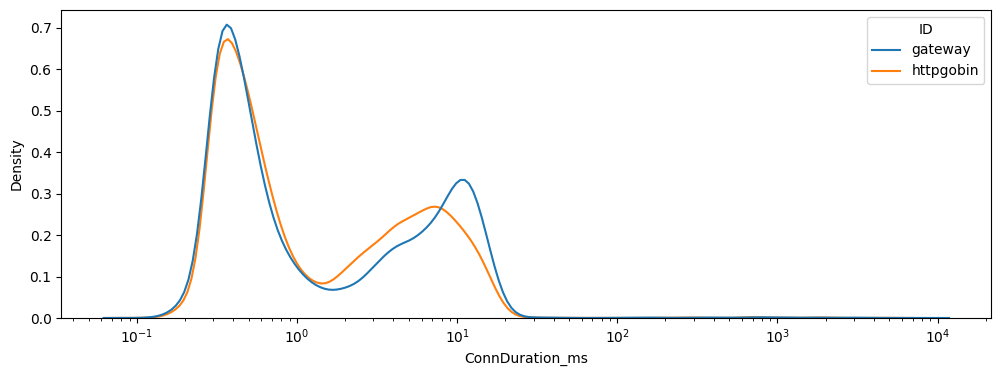

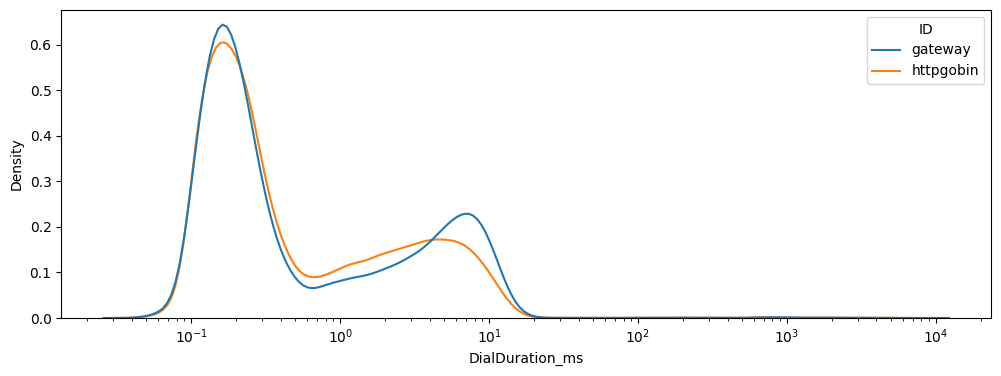

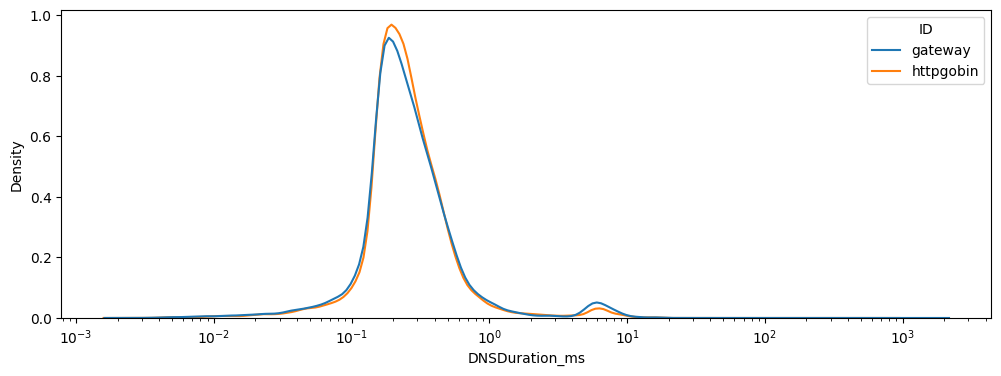

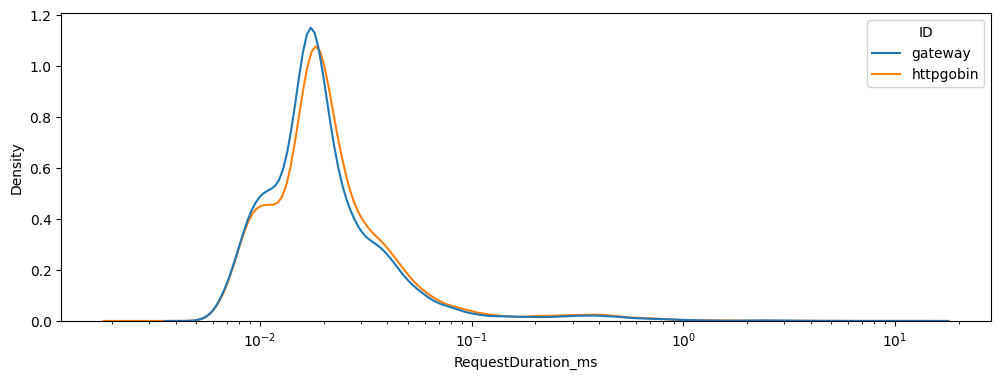

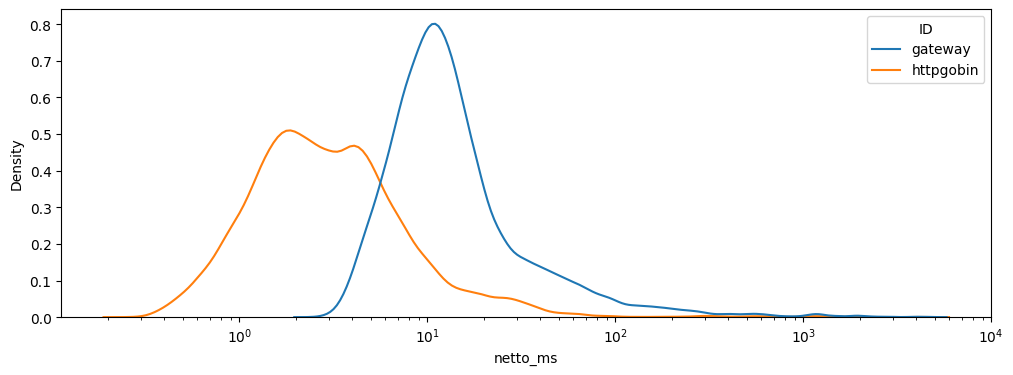

In [21]:
df['netto_ms'] = df['Duration_ms'] - df['ConnDuration_ms']
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.kdeplot(data=df,x=col,hue="ID", log_scale=(True,False))
        plt.show()